In [1]:
# Algoritmo Gap Statistic
# Rosana Guimarães Ribeiro

%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from numpy import linalg as LA
from numpy import genfromtxt

In [2]:
def within_sum_of_squares(points_cluster, cluster_center):  
    
    wk = []
    K_max = len(cluster_center)
    for k in range(K_max):
        for pc in points_cluster[k]:
            wk.append((LA.norm(pc - cluster_center[k])**2)/(2*len(pc)))
    
    return sum(wk)
    

In [3]:
def bbox(points):
    
    x_coord, y_coord = zip(*points)
    
    return [(min(x_coord), max(x_coord)), (min(y_coord), max(y_coord))]


In [4]:
def get_points_cluster(X_gaussian, kmeans):

    points_cluster = {}
    points_cluster = {j: X_gaussian[np.where(kmeans.labels_ == j)[0]] for j in range(kmeans.n_clusters)}
    
    return points_cluster


In [5]:
def gap_statistic(X_gaussian):
    
    (xmin,xmax), (ymin,ymax) = bbox(X_gaussian)
    
    n_clusters = range(1,10)
    B = 10
    Wk = np.zeros(len(n_clusters))
    Wkb = np.zeros(B)
    sdk = np.zeros(len(n_clusters))
    gap = np.zeros(len(n_clusters))
    
    for i, k in enumerate(n_clusters):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X_gaussian)
        points_cluster = get_points_cluster(X_gaussian, kmeans)
        print(points_cluster)
        
        #Step 1
        Wk[i] = np.log(within_sum_of_squares(points_cluster, kmeans.cluster_centers_))
        
        Wkb_aux = np.zeros(B)
        #Step 2
        for b in range(B):
            X_new = np.zeros((X_gaussian.shape[0],X_gaussian.shape[1]))
            X_new = [np.random.uniform(xmin,xmax, size=(X_gaussian.shape[0])), np.random.uniform(ymin,ymax, size = (X_gaussian.shape[0]))]
            X_new = np.moveaxis(np.array(X_new), -1, 0)
            
            kmeans = KMeans(n_clusters=k, random_state=0).fit(X_new)
            points_cluster = get_points_cluster(X_new, kmeans)
            Wkb_aux[b] = np.log(within_sum_of_squares(points_cluster, kmeans.cluster_centers_))
            
        #Step 3
        Wkb[i] = sum(Wkb_aux)/B
        sdk[i] = np.sqrt(sum((Wkb_aux - Wkb[i]) ** 2)/B)
        
        #Step 2
        gap[i] = Wkb[i] - Wk[i]
    #Step 3
    sk = sdk*np.sqrt(1 + 1/B)

    print("k\tWk\t\tWkbs\t\tsk\t\tgap")
    for k, wk, wkbs, s, g in zip(n_clusters, Wk, Wkb, sk, gap):
        print("{0}\t{1:.7f}\t{2:.7f}\t{3:.7f}\t{4:.7f}".format( k, wk, wkbs, s, g))
        
    print("\n\nBest number of clusters: ", np.argmax(gap) + 1)

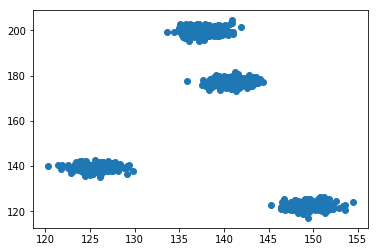

In [6]:
#Generate isotropic Gaussian blobs for clustering.

center_box = (100, 200)
std = 1.5
X_gaussian,y = make_blobs(800, n_features=2, centers=4, center_box=center_box, cluster_std=std, random_state=50)

#X_gaussian = genfromtxt('x_gaussian.csv', delimiter=',')
plt.scatter(X_gaussian[:,0], X_gaussian[:,1])
plt.show()

In [7]:
X_gaussian

array([[136.51192018, 199.81955131],
       [124.86737021, 137.91525393],
       [139.92416416, 178.93396328],
       ...,
       [137.49909024, 199.37857614],
       [139.04098382, 201.49069147],
       [146.9606363 , 122.47981824]])

In [13]:
X_gaussian[:,0] = (X_gaussian[:,0] - min(X_gaussian[:,0]))/(max(X_gaussian[:,0]) - min(X_gaussian[:,0]))
X_gaussian[:,1] = (X_gaussian[:,1] - min(X_gaussian[:,1]))/(max(X_gaussian[:,1]) - min(X_gaussian[:,1]))
X_gaussian

array([[0.90976886, 0.15321856],
       [0.06484129, 0.27158445],
       [0.28516623, 0.94803265],
       ...,
       [0.43492003, 0.09895818],
       [0.47627824, 0.07962695],
       [0.23780673, 0.96423857]])

In [8]:
np.savetxt('cluster4.csv', X_gaussian, delimiter=',')

In [9]:
gap_statistic(X_gaussian)

{0: array([[174.39534933, 130.23462536],
       [125.20759319, 140.38655391],
       [138.03388732, 198.40372617],
       ...,
       [146.75185747, 125.58085613],
       [149.15954008, 123.92286754],
       [135.27683702, 199.79366425]])}
{0: array([[174.39534933, 130.23462536],
       [125.20759319, 140.38655391],
       [149.20730273, 122.51446205],
       ...,
       [176.68385909, 131.1683189 ],
       [146.75185747, 125.58085613],
       [149.15954008, 123.92286754]]), 1: array([[138.03388732, 198.40372617],
       [140.23078413, 200.90327185],
       [140.5873005 , 176.91055261],
       [135.79740413, 200.16410414],
       [141.08960084, 176.72910572],
       [139.97569157, 201.79717189],
       [140.52325264, 174.92153037],
       [142.86233898, 175.55034764],
       [138.03395879, 201.56458792],
       [140.10384199, 177.65745735],
       [140.93050216, 180.43563567],
       [134.06766931, 200.61393993],
       [138.90645458, 197.70587494],
       [136.60428855, 200.66386834],

{0: array([[125.20759319, 140.38655391],
       [132.65001053, 133.23734595],
       [125.44413299, 140.37245324],
       [135.50742275, 134.32276666],
       [135.22870234, 133.02466703],
       [133.77744839, 134.38551004],
       [124.49110924, 136.96514502],
       [124.87719355, 139.29568728],
       [136.08310652, 137.02183651],
       [127.19026636, 141.36121042],
       [133.16683149, 135.88058006],
       [123.79277907, 140.8552538 ],
       [124.84386043, 140.10817399],
       [125.72047096, 140.51919265],
       [125.08033545, 141.14962801],
       [124.9691464 , 140.49573924],
       [126.14637207, 138.08112673],
       [126.18416005, 139.88997696],
       [127.99300049, 137.67332752],
       [133.40033923, 133.55461296],
       [134.68029861, 136.33085204],
       [125.39906139, 138.5532617 ],
       [136.96044923, 133.43828035],
       [134.59747483, 136.53682039],
       [124.92952737, 136.88447433],
       [133.22732218, 137.84588301],
       [136.03581237, 135.76870221

{0: array([[125.20759319, 140.38655391],
       [132.65001053, 133.23734595],
       [125.44413299, 140.37245324],
       [135.50742275, 134.32276666],
       [135.22870234, 133.02466703],
       [133.77744839, 134.38551004],
       [124.49110924, 136.96514502],
       [124.87719355, 139.29568728],
       [136.08310652, 137.02183651],
       [127.19026636, 141.36121042],
       [133.16683149, 135.88058006],
       [123.79277907, 140.8552538 ],
       [124.84386043, 140.10817399],
       [125.72047096, 140.51919265],
       [125.08033545, 141.14962801],
       [124.9691464 , 140.49573924],
       [126.14637207, 138.08112673],
       [126.18416005, 139.88997696],
       [127.99300049, 137.67332752],
       [133.40033923, 133.55461296],
       [134.68029861, 136.33085204],
       [125.39906139, 138.5532617 ],
       [136.96044923, 133.43828035],
       [134.59747483, 136.53682039],
       [124.92952737, 136.88447433],
       [133.22732218, 137.84588301],
       [136.03581237, 135.76870221

{0: array([[125.20759319, 140.38655391],
       [132.65001053, 133.23734595],
       [125.44413299, 140.37245324],
       [135.50742275, 134.32276666],
       [135.22870234, 133.02466703],
       [133.77744839, 134.38551004],
       [124.49110924, 136.96514502],
       [124.87719355, 139.29568728],
       [136.08310652, 137.02183651],
       [127.19026636, 141.36121042],
       [133.16683149, 135.88058006],
       [123.79277907, 140.8552538 ],
       [124.84386043, 140.10817399],
       [125.72047096, 140.51919265],
       [125.08033545, 141.14962801],
       [124.9691464 , 140.49573924],
       [126.14637207, 138.08112673],
       [126.18416005, 139.88997696],
       [127.99300049, 137.67332752],
       [133.40033923, 133.55461296],
       [134.68029861, 136.33085204],
       [125.39906139, 138.5532617 ],
       [136.96044923, 133.43828035],
       [134.59747483, 136.53682039],
       [124.92952737, 136.88447433],
       [133.22732218, 137.84588301],
       [136.03581237, 135.76870221

{0: array([[125.20759319, 140.38655391],
       [125.44413299, 140.37245324],
       [124.49110924, 136.96514502],
       [124.87719355, 139.29568728],
       [127.19026636, 141.36121042],
       [123.79277907, 140.8552538 ],
       [124.84386043, 140.10817399],
       [125.72047096, 140.51919265],
       [125.08033545, 141.14962801],
       [124.9691464 , 140.49573924],
       [126.14637207, 138.08112673],
       [126.18416005, 139.88997696],
       [127.99300049, 137.67332752],
       [125.39906139, 138.5532617 ],
       [124.92952737, 136.88447433],
       [122.48254051, 140.63801031],
       [124.66544335, 140.94789532],
       [127.09450031, 136.95109319],
       [123.33341606, 141.04411267],
       [124.83460845, 138.50853584],
       [127.95194224, 140.22118449],
       [127.06652931, 140.20415849],
       [127.19449839, 139.7126521 ],
       [125.01727785, 136.25896834],
       [126.02929996, 141.01356767],
       [125.67225967, 140.28926328],
       [124.77760942, 137.66401339

{0: array([[125.20759319, 140.38655391],
       [125.44413299, 140.37245324],
       [124.49110924, 136.96514502],
       [124.87719355, 139.29568728],
       [127.19026636, 141.36121042],
       [123.79277907, 140.8552538 ],
       [124.84386043, 140.10817399],
       [125.72047096, 140.51919265],
       [125.08033545, 141.14962801],
       [124.9691464 , 140.49573924],
       [126.14637207, 138.08112673],
       [126.18416005, 139.88997696],
       [127.99300049, 137.67332752],
       [125.39906139, 138.5532617 ],
       [124.92952737, 136.88447433],
       [122.48254051, 140.63801031],
       [124.66544335, 140.94789532],
       [127.09450031, 136.95109319],
       [123.33341606, 141.04411267],
       [124.83460845, 138.50853584],
       [127.95194224, 140.22118449],
       [127.06652931, 140.20415849],
       [127.19449839, 139.7126521 ],
       [125.01727785, 136.25896834],
       [126.02929996, 141.01356767],
       [125.67225967, 140.28926328],
       [124.77760942, 137.66401339

{0: array([[174.39534933, 130.23462536],
       [176.82169891, 131.82654306],
       [176.67056138, 129.16796128],
       [176.79644444, 129.68760048],
       [178.03435872, 130.90620707],
       [177.22140444, 133.317308  ],
       [176.57625105, 131.08730472],
       [176.14096724, 133.15733086],
       [176.2801595 , 131.5182961 ],
       [175.36681167, 131.31152679],
       [177.51656759, 131.7618056 ],
       [176.66450614, 130.90583257],
       [173.67459416, 129.41762605],
       [177.06503438, 131.16846848],
       [176.5348956 , 130.80499931],
       [177.5187054 , 128.92001345],
       [176.46052039, 132.14598769],
       [176.33317056, 133.54087283],
       [173.40282761, 130.9506885 ],
       [176.56122238, 131.32936497],
       [179.26463192, 130.45147399],
       [174.66560278, 131.15033675],
       [175.62802341, 132.36354295],
       [174.20374756, 129.34283916],
       [176.6227897 , 131.15090085],
       [177.34972284, 133.40560781],
       [175.71385005, 132.2540897 

{0: array([[136.08310652, 137.02183651],
       [133.16683149, 135.88058006],
       [134.68029861, 136.33085204],
       [134.59747483, 136.53682039],
       [133.22732218, 137.84588301],
       [136.03581237, 135.76870221],
       [136.99770643, 135.70118195],
       [134.98216324, 136.62583063],
       [136.9376316 , 137.14805918],
       [134.21470824, 136.78854813],
       [135.41872458, 138.64022488],
       [134.73912359, 135.87400918],
       [135.16550078, 137.39497951],
       [137.31729368, 135.89431196],
       [135.94615661, 136.63335557],
       [136.25622156, 135.85017991],
       [132.74673097, 137.41491447],
       [134.9853189 , 138.10290601],
       [135.28180154, 137.02356821],
       [136.31139999, 135.95543745],
       [134.46211576, 137.19264124],
       [137.6492684 , 134.89764344],
       [133.84585839, 135.82238937],
       [135.69026438, 135.0805146 ],
       [133.47987965, 137.04428177],
       [135.43694773, 135.40516793],
       [134.0487311 , 137.2355166 

k	Wk		Wkbs		sk		gap
1	12.2399912	12.0873774	0.0223647	-0.1526137
2	11.0583813	11.3723282	0.0187642	0.3139470
3	10.0915992	11.0535696	0.0218256	0.9619704
4	9.3134831	10.6972908	0.0279723	1.3838077
5	7.8908096	10.4437285	0.0277660	2.5529189
6	6.8135071	10.1973654	0.0198695	3.3838584
7	6.7389266	10.0862929	0.0287027	3.3473663
8	6.6620197	9.9569927	0.0177197	3.2949729
9	6.5911199	9.8345184	0.0113578	3.2433985


Best number of clusters:  6
